### Import

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import re
import matplotlib.image as mpimg
import os
from PIL import Image
from itertools import product

# Полностью отключить все предупреждения
warnings.filterwarnings("ignore")

os.makedirs("ims", exist_ok=True)
# os.makedirs("ims/current", exist_ok=True)
os.makedirs("ims/all", exist_ok=True)


volume = 160 # для Si в A^3

# In[116]:


plt.rcParams['font.family'] = 'serif'
import matplotlib
# matplotlib.use('Agg')
# print(matplotlib.get_backend())

### funcs

In [2]:
#!/usr/bin/env python
# coding: utf-8

# ### Import


# ### Nonlinear

# In[43]:


def plot_nonlinear_response_v1(folder, ax):

    # Загрузка данных, пропуская строки с комментариями (начинаются с #)
    data = pd.read_csv(
        folder + '/pulse_1e12_rt.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )

    # Назначим читаемые имена колонкам
    data.columns = [
        'time_fs',         # 1
        'Ac_ext_x',        # 2
        'Ac_ext_y',        # 3
        'Ac_ext_z',        # 4
        'E_ext_x',         # 5
        'E_ext_y',         # 6
        'E_ext_z',         # 7
        'Ac_tot_x',        # 8
        'Ac_tot_y',        # 9
        'Ac_tot_z',        #10
        'E_tot_x',         #11
        'E_tot_y',         #12
        'E_tot_z',         #13
        'Jm_x',         #14
        'Jm_y',         #15
        'Jm_z',         #16
    ]

    t = data['time_fs']
    Jm = data['Jm_'+ax]
    El_f = data['E_ext_z']

    # 1:Time[fs] 2:Ac_ext_x[fs*V/Angstrom] 3:Ac_ext_y[fs*V/Angstrom] 4:Ac_ext_z[fs*V/Angstrom]
    #5:E_ext_x[V/Angstrom] 6:E_ext_y[V/Angstrom] 7:E_ext_z[V/Angstrom] 8:Ac_tot_x[fs*V/Angstrom]
    # 9:Ac_tot_y[fs*V/Angstrom] 10:Ac_tot_z[fs*V/Angstrom] 11:E_tot_x[V/Angstrom]
    # 12:E_tot_y[V/Angstrom] 13:E_tot_z[V/Angstrom]  14:Jm_x[1/fs*Angstrom^2] 15:Jm_y[1/fs*Angstrom^2] 16:Jm_z[1/fs*Angstrom^2]


    # Построим графики
    # plt.figure(figsize=(10, 7.5))
    plt.figure(figsize=(10, 2.5))

    # Общий заголовок для всей фигуры
    plt.suptitle(' '.join(re.split('[/_]', folder)), fontsize=14)

    # # Первый график: внешнее поле по z
    # plt.subplot(3, 2, 1)
    # plt.plot(data['time_fs'], data['E_ext_z'], label='E_ext_z', color='blue')
    # plt.xlabel('Time [fs]')
    # plt.ylabel('E [V/Å]')
    # plt.title('External electric field z')
    # plt.grid(True)
    # #plt.legend()

    # Второй график: дипольный момент по z
    # plt.subplot(3, 2, 4)
    plt.subplot(1, 2, 2)
    plt.plot(data['time_fs'], data['Jm_'+ax], label='Dipole Moment z', color='magenta')
    plt.xlabel('Time [fs]')
    plt.ylabel('J [$fs^{-1} \\cdot Å^{-2}$]')
    plt.title('Full matter current density')
    plt.grid(True)
    #plt.legend()

    plt.tight_layout()

    # Загрузка данных с указанием имен столбцов
    energy_data = pd.read_csv(
        folder + '/pulse_1e12_rt_energy.data',
        comment='#',
        delim_whitespace=True,
        header=None,
        names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
    )

    # Построение графика изменения энергии во времени
    # plt.subplot(3, 2, 3)
    plt.subplot(1, 2, 1)
    plt.plot(energy_data['Time_fs'], energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='r')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [eV]')
    plt.title('Full excitation energy per unit cell')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()

    del_E = energy_data['Delta_E_eV']

    # Загрузка данных с указанием имен столбцов
    data = pd.read_csv(
        folder + '/pulse_1e12_pulse.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )

    # Назначим читаемые имена колонкам
    data.columns = [
        'energy_eV',           # 1
        'Re_Jm_x',             # 2
        'Re_Jm_y',             # 3
        'Re_Jm_z',             # 4
        'Im_Jm_x',             # 5
        'Im_Jm_y',             # 6
        'Im_Jm_z',             # 7
        'Abs2_Jm_x',           # 8
        'Abs2_Jm_y',           # 9
        'Abs2_Jm_z',           #10
        'Re_E_ext_x',          #11
        'Re_E_ext_y',          #12
        'Re_E_ext_z',          #13
        'Im_E_ext_x',          #14
        'Im_E_ext_y',          #15
        'Im_E_ext_z',          #16
        'Abs2_E_ext_x',        #17
        'Abs2_E_ext_y',        #18
        'Abs2_E_ext_z',        #19
        'Re_E_tot_x',          #20
        'Re_E_tot_y',          #21
        'Re_E_tot_z',          #22
        'Im_E_tot_x',          #23
        'Im_E_tot_y',          #24
        'Im_E_tot_z',          #25
        'Abs2_E_tot_x',        #26
        'Abs2_E_tot_y',        #27
        'Abs2_E_tot_z',        #28
    ]

    Jw2 = data['Abs2_Jm_'+ax]
    energy = data['energy_eV']
    # # Построение графика для 1 и 10 колонки
    # plt.subplot(3, 2, 2)
    # plt.plot(data['energy_eV'], data['Abs2_Jm_'+ax], label='', color='c')
    # plt.xlabel('Energy [eV]')
    # plt.ylabel('|J($\omega)|^2 [Å^{-4}]$')
    # plt.yscale('log')
    # plt.title('Power spectrum')
    # plt.grid(True)
    # #plt.legend()
    # plt.tight_layout()

        # Загрузка данных, пропуская строки с комментариями (начинаются с #)
    data = pd.read_csv(
        folder + '/pulse_1e6_rt.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )

    # Назначим читаемые имена колонкам
    data.columns = [
        'time_fs',         # 1
        'Ac_ext_x',        # 2
        'Ac_ext_y',        # 3
        'Ac_ext_z',        # 4
        'E_ext_x',         # 5
        'E_ext_y',         # 6
        'E_ext_z',         # 7
        'Ac_tot_x',        # 8
        'Ac_tot_y',        # 9
        'Ac_tot_z',        #10
        'E_tot_x',         #11
        'E_tot_y',         #12
        'E_tot_z',         #13
        'Jm_x',         #14
        'Jm_y',         #15
        'Jm_z',         #16
    ]

    J_nonl = Jm - 10**3*data['Jm_'+ax]

    # plt.subplot(3, 2, 6)
    # plt.plot(data['time_fs'], Jm - 10**3*data['Jm_'+ax], label='', color='orange')
    # plt.xlabel('Time [fs]')
    # plt.ylabel('J [$fs^{-1} \cdot Å^{-2}$]')
    # plt.title('Nonlinear matter current density')
    # plt.grid(True)


    # Загрузка данных с указанием имен столбцов
    energy_data = pd.read_csv(
        folder + '/pulse_1e6_rt_energy.data',
        comment='#',
        delim_whitespace=True,
        header=None,
        names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
    )

    # # Построение графика изменения энергии во времени
    # plt.subplot(3, 2, 5)
    # plt.plot(energy_data['Time_fs'], del_E -10**6*energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='lime')
    # plt.xlabel('Time [fs]')
    # plt.ylabel('E [eV]')
    # plt.title('Nonlinear excitation energy per unit cell')
    # plt.grid(True)
    # #plt.legend()
    # plt.tight_layout()
    # plt.show()

    plt.savefig("ims/current/" + folder + ".png")

    return t, energy, Jw2, El_f, J_nonl, Jm


# In[44]:


def plot_nonlinear_response_v2(folder, ax):

    # Загрузка данных, пропуская строки с комментариями (начинаются с #)
    data = pd.read_csv(
        folder + '/pulse_1e12_rt.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )

    # Назначим читаемые имена колонкам
    data.columns = [
        'time_fs',         # 1
        'Ac_ext_x',        # 2
        'Ac_ext_y',        # 3
        'Ac_ext_z',        # 4
        'E_ext_x',         # 5
        'E_ext_y',         # 6
        'E_ext_z',         # 7
        'Ac_tot_x',        # 8
        'Ac_tot_y',        # 9
        'Ac_tot_z',        #10
        'E_tot_x',         #11
        'E_tot_y',         #12
        'E_tot_z',         #13
        'Jm_x',         #14
        'Jm_y',         #15
        'Jm_z',         #16
    ]

    t = data['time_fs']
    Jm = data['Jm_'+ax]
    El_f = data['E_ext_z']

    # 1:Time[fs] 2:Ac_ext_x[fs*V/Angstrom] 3:Ac_ext_y[fs*V/Angstrom] 4:Ac_ext_z[fs*V/Angstrom]
    #5:E_ext_x[V/Angstrom] 6:E_ext_y[V/Angstrom] 7:E_ext_z[V/Angstrom] 8:Ac_tot_x[fs*V/Angstrom]
    # 9:Ac_tot_y[fs*V/Angstrom] 10:Ac_tot_z[fs*V/Angstrom] 11:E_tot_x[V/Angstrom]
    # 12:E_tot_y[V/Angstrom] 13:E_tot_z[V/Angstrom]  14:Jm_x[1/fs*Angstrom^2] 15:Jm_y[1/fs*Angstrom^2] 16:Jm_z[1/fs*Angstrom^2]


    # Построим графики
    plt.figure(figsize=(10, 7.5))

    # Общий заголовок для всей фигуры
    plt.suptitle(' '.join(re.split('[/_]', folder)), fontsize=14)

    # Первый график: внешнее поле по z
    plt.subplot(3, 2, 1)
    plt.plot(data['time_fs'], data['E_ext_z'], label='E_ext_z', color='blue')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [V/Å]')
    plt.title('External electric field z')
    plt.grid(True)
    #plt.legend()

    # Второй график: дипольный момент по z
    plt.subplot(3, 2, 4)
    plt.plot(data['time_fs'], data['Jm_'+ax], label='Dipole Moment z', color='magenta')
    plt.xlabel('Time [fs]')
    plt.ylabel('J [$fs^{-1} \\cdot Å^{-2}$]')
    plt.title('Full matter current density')
    plt.grid(True)
    #plt.legend()

    plt.tight_layout()

    # Загрузка данных с указанием имен столбцов
    energy_data = pd.read_csv(
        folder + '/pulse_1e12_rt_energy.data',
        comment='#',
        delim_whitespace=True,
        header=None,
        names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
    )

    # Построение графика изменения энергии во времени
    plt.subplot(3, 2, 3)
    plt.plot(energy_data['Time_fs'], energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='r')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [eV]')
    plt.title('Full excitation energy per unit cell')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()

    del_E = energy_data['Delta_E_eV']

    # Загрузка данных с указанием имен столбцов
    data = pd.read_csv(
        folder + '/pulse_1e12_pulse.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )

    # Назначим читаемые имена колонкам
    data.columns = [
        'energy_eV',           # 1
        'Re_Jm_x',             # 2
        'Re_Jm_y',             # 3
        'Re_Jm_z',             # 4
        'Im_Jm_x',             # 5
        'Im_Jm_y',             # 6
        'Im_Jm_z',             # 7
        'Abs2_Jm_x',           # 8
        'Abs2_Jm_y',           # 9
        'Abs2_Jm_z',           #10
        'Re_E_ext_x',          #11
        'Re_E_ext_y',          #12
        'Re_E_ext_z',          #13
        'Im_E_ext_x',          #14
        'Im_E_ext_y',          #15
        'Im_E_ext_z',          #16
        'Abs2_E_ext_x',        #17
        'Abs2_E_ext_y',        #18
        'Abs2_E_ext_z',        #19
        'Re_E_tot_x',          #20
        'Re_E_tot_y',          #21
        'Re_E_tot_z',          #22
        'Im_E_tot_x',          #23
        'Im_E_tot_y',          #24
        'Im_E_tot_z',          #25
        'Abs2_E_tot_x',        #26
        'Abs2_E_tot_y',        #27
        'Abs2_E_tot_z',        #28
    ]

    Jw2 = data['Abs2_Jm_'+ax]
    energy = data['energy_eV']
    # Построение графика для 1 и 10 колонки
    plt.subplot(3, 2, 2)
    plt.plot(data['energy_eV'], data['Abs2_Jm_'+ax], label='', color='c')
    plt.xlabel('Energy [eV]')
    plt.ylabel('|J($\\omega)|^2 [Å^{-4}]$')
    plt.yscale('log')
    plt.title('Power spectrum')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()

        # Загрузка данных, пропуская строки с комментариями (начинаются с #)
    data = pd.read_csv(
        folder + '/pulse_1e6_rt.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )

    # Назначим читаемые имена колонкам
    data.columns = [
        'time_fs',         # 1
        'Ac_ext_x',        # 2
        'Ac_ext_y',        # 3
        'Ac_ext_z',        # 4
        'E_ext_x',         # 5
        'E_ext_y',         # 6
        'E_ext_z',         # 7
        'Ac_tot_x',        # 8
        'Ac_tot_y',        # 9
        'Ac_tot_z',        #10
        'E_tot_x',         #11
        'E_tot_y',         #12
        'E_tot_z',         #13
        'Jm_x',         #14
        'Jm_y',         #15
        'Jm_z',         #16
    ]

    J_nonl = Jm - 10**3*data['Jm_'+ax]

    plt.subplot(3, 2, 6)
    plt.plot(data['time_fs'], Jm - 10**3*data['Jm_'+ax], label='', color='orange')
    plt.xlabel('Time [fs]')
    plt.ylabel('J [$fs^{-1} \\cdot Å^{-2}$]')
    plt.title('Nonlinear matter current density')
    plt.grid(True)


    # Загрузка данных с указанием имен столбцов
    energy_data = pd.read_csv(
        folder + '/pulse_1e6_rt_energy.data',
        comment='#',
        delim_whitespace=True,
        header=None,
        names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
    )

    # Построение графика изменения энергии во времени
    plt.subplot(3, 2, 5)
    plt.plot(energy_data['Time_fs'], del_E -10**6*energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='lime')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [eV]')
    plt.title('Nonlinear excitation energy per unit cell')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()
    # plt.show()
    plt.savefig("ims/all/" + folder + ".png")

    return t, energy, Jw2, El_f, J_nonl, Jm


# In[45]:

### plots_v3

In [3]:
def plot_nonlinear_response_v3(folder, ax):

    # Загрузка данных, пропуская строки с комментариями (начинаются с #)
    data = pd.read_csv(
        folder + '/pulse_1e12_rt.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )

    # Назначим читаемые имена колонкам
    data.columns = [
        'time_fs',         # 1
        'Ac_ext_x',        # 2
        'Ac_ext_y',        # 3
        'Ac_ext_z',        # 4
        'E_ext_x',         # 5
        'E_ext_y',         # 6
        'E_ext_z',         # 7
        'Ac_tot_x',        # 8
        'Ac_tot_y',        # 9
        'Ac_tot_z',        #10
        'E_tot_x',         #11
        'E_tot_y',         #12
        'E_tot_z',         #13
        'Jm_x',         #14
        'Jm_y',         #15
        'Jm_z',         #16
    ]

    t = data['time_fs']
    Jm = data['Jm_'+ax]
    El_f = data['E_ext_z']

    # 1:Time[fs] 2:Ac_ext_x[fs*V/Angstrom] 3:Ac_ext_y[fs*V/Angstrom] 4:Ac_ext_z[fs*V/Angstrom]
    #5:E_ext_x[V/Angstrom] 6:E_ext_y[V/Angstrom] 7:E_ext_z[V/Angstrom] 8:Ac_tot_x[fs*V/Angstrom]
    # 9:Ac_tot_y[fs*V/Angstrom] 10:Ac_tot_z[fs*V/Angstrom] 11:E_tot_x[V/Angstrom]
    # 12:E_tot_y[V/Angstrom] 13:E_tot_z[V/Angstrom]  14:Jm_x[1/fs*Angstrom^2] 15:Jm_y[1/fs*Angstrom^2] 16:Jm_z[1/fs*Angstrom^2]


    # Построим графики
    plt.figure(figsize=(10, 12.5))

    # Общий заголовок для всей фигуры
    plt.suptitle(' '.join(re.split('[/_]', folder)), fontsize=14)

    # Первый график: внешнее поле по z
    plt.subplot(5, 2, 1)
    plt.plot(data['time_fs'], data['E_ext_z'], label='E_ext_z', color='#2CD311')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [V/Å]')
    plt.title('External electric field z')
    plt.grid(True)
    #plt.legend()




    # Второй график: дипольный момент по z
    plt.subplot(5, 2, 4)
    plt.plot(data['time_fs'], data['Jm_'+ax], label='Dipole Moment z', color='magenta')
    plt.xlabel('Time [fs]')
    plt.ylabel('J [$fs^{-1} \\cdot Å^{-2}$]')
    plt.title('Full matter current density')
    plt.grid(True)
    #plt.legend()

    plt.tight_layout()

    # Загрузка данных с указанием имен столбцов
    energy_data = pd.read_csv(
        folder + '/pulse_1e12_rt_energy.data',
        comment='#',
        delim_whitespace=True,
        header=None,
        names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
    )






    product = El_f * Jm * volume
    # Разность по времени
    dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
    integral_cumulative = np.cumsum(product * dt)


    # Построение графика изменения энергии во времени
    plt.subplot(5, 2, 3)
    # plt.plot(energy_data['Time_fs'], energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='r')
    plt.plot(t, -integral_cumulative, label='ΔE = E_total - E_initial', color='r')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [eV]')
    plt.title('Full excitation energy per unit cell')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()

    del_E = energy_data['Delta_E_eV']

    # Загрузка данных с указанием имен столбцов
    data = pd.read_csv(
        folder + '/pulse_1e12_pulse.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )

    # Назначим читаемые имена колонкам
    data.columns = [
        'energy_eV',           # 1
        'Re_Jm_x',             # 2
        'Re_Jm_y',             # 3
        'Re_Jm_z',             # 4
        'Im_Jm_x',             # 5
        'Im_Jm_y',             # 6
        'Im_Jm_z',             # 7
        'Abs2_Jm_x',           # 8
        'Abs2_Jm_y',           # 9
        'Abs2_Jm_z',           #10
        'Re_E_ext_x',          #11
        'Re_E_ext_y',          #12
        'Re_E_ext_z',          #13
        'Im_E_ext_x',          #14
        'Im_E_ext_y',          #15
        'Im_E_ext_z',          #16
        'Abs2_E_ext_x',        #17
        'Abs2_E_ext_y',        #18
        'Abs2_E_ext_z',        #19
        'Re_E_tot_x',          #20
        'Re_E_tot_y',          #21
        'Re_E_tot_z',          #22
        'Im_E_tot_x',          #23
        'Im_E_tot_y',          #24
        'Im_E_tot_z',          #25
        'Abs2_E_tot_x',        #26
        'Abs2_E_tot_y',        #27
        'Abs2_E_tot_z',        #28
    ]

    Jw2 = data['Abs2_Jm_'+ax]
    energy = data['energy_eV']
    # Построение графика для 1 и 10 колонки
    plt.subplot(5, 2, 2)
    plt.plot(data['energy_eV'], data['Abs2_Jm_'+ax], label='', color='c')
    plt.xlabel('Energy [eV]')
    plt.ylabel('|J($\\omega)|^2 [Å^{-4}]$')
    plt.yscale('log')
    plt.title('Power spectrum')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()

        # Загрузка данных, пропуская строки с комментариями (начинаются с #)
    data = pd.read_csv(
        folder + '/pulse_1e6_rt.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )

    # Назначим читаемые имена колонкам
    data.columns = [
        'time_fs',         # 1
        'Ac_ext_x',        # 2
        'Ac_ext_y',        # 3
        'Ac_ext_z',        # 4
        'E_ext_x',         # 5
        'E_ext_y',         # 6
        'E_ext_z',         # 7
        'Ac_tot_x',        # 8
        'Ac_tot_y',        # 9
        'Ac_tot_z',        #10
        'E_tot_x',         #11
        'E_tot_y',         #12
        'E_tot_z',         #13
        'Jm_x',         #14
        'Jm_y',         #15
        'Jm_z',         #16
    ]

    J_nonl = Jm - 10**3*data['Jm_'+ax]

    plt.subplot(5, 2, 6)
    plt.plot(data['time_fs'], Jm - 10**3*data['Jm_'+ax], label='', color='black')
    plt.xlabel('Time [fs]')
    plt.ylabel('J [$fs^{-1} \\cdot Å^{-2}$]')
    plt.title('Nonlinear matter current density')
    plt.grid(True)




    product = El_f * (10**3*data['Jm_'+ax]) * volume
    # Разность по времени
    dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
    integral_cumulative = np.cumsum(product * dt)



    # Построение графика изменения энергии во времени
    plt.subplot(5, 2, 7)
    plt.plot(t, -integral_cumulative, label='ΔE = E_total - E_initial', color='#DC143C')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [eV]')
    plt.title('Linear excitation energy per unit cell')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()



    plt.subplot(5, 2, 8)
    plt.plot(data['time_fs'], 10**3*data['Jm_'+ax], label='', color='#00FF7F')
    plt.xlabel('Time [fs]')
    plt.ylabel('J [$fs^{-1} \\cdot Å^{-2}$]')
    plt.title('Linear matter current density')
    plt.grid(True)
    plt.tight_layout()


    # Загрузка данных с указанием имен столбцов
    energy_data = pd.read_csv(
        folder + '/pulse_1e6_rt_energy.data',
        comment='#',
        delim_whitespace=True,
        header=None,
        names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
    )



    product = El_f * J_nonl * volume
    # Разность по времени
    dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
    integral_cumulative = np.cumsum(product * dt)


    # Построение графика изменения энергии во времени
    plt.subplot(5, 2, 5)
    plt.plot(t, -integral_cumulative, label='ΔE = E_total - E_initial', color='blue')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [eV]')
    plt.title('Nonlinear excitation energy per unit cell')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()




    lr_data = pd.read_csv(
        folder + '/lr_response.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )

    lr_data.columns = [
        'Energy',        # 1
        'Re_sigma_x',    # 2
        'Re_sigma_y',    # 3
        'Re_sigma_z',    # 4
        'Im_sigma_x',    # 5
        'Im_sigma_y',    # 6
        'Im_sigma_z',    # 7
        'Re_eps_x',      # 8
        'Re_eps_y',      # 9
        'Re_eps_z',      # 10
        'Im_eps_x',      # 11
        'Im_eps_y',      # 12
        'Im_eps_z',      # 13
    ]


    # Построение графика изменения энергии во времени
    plt.subplot(5, 2, 9)
    plt.plot(lr_data['Energy'][100:], lr_data['Im_eps_z'][100:], label='Im(ε)', color='#00BFFF')
    plt.xlabel('E [eV]')
    plt.ylabel('Im(ε)')
    plt.title('Absorption')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()

    # Построение графика изменения энергии во времени
    plt.subplot(5, 2, 10)
    plt.plot(lr_data['Energy'][100:], lr_data['Re_eps_z'][100:], label='Re(ε)', color='#FF007F')
    plt.xlabel('E [eV]')
    plt.ylabel('Re(ε)')
    plt.title('Dispersion')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()
    # plt.show()

    # plt.savefig("ims/all/" + folder + ".pdf")
    plt.savefig("ims/all/" + folder + ".png", dpi=200)


# In[46]:


def extract_c_num(s):
    start = s.index('c') + 1
    end = s.index('_', start)
    return int(s[start:end])

def extract_s_num(s):
    start = s.index('_s') + 2
    end = s.index('_', start)
    return float(s[start:end])

def extract_k_num(s):
    start = s.index('_k') + 2
    end = s.index('_', start)
    return int(s[start:end])

def extract_a_num(s):
    start = s.index('_a') + 2
    end = s.index('_', start)
    return float(s[start:end])

def extract_r_num(s):
    start = s.index('_r') + 2
    end = s.index('_', start)
    return float(s[start:end])

### Plots

In [12]:
ax = 'z'

folders = [name for name in os.listdir('.') if os.path.isdir(os.path.join('.', name))]

# folders = [f for f in folders if f.startswith('c')]
folders = [f for f in folders 
           if f.startswith('c') 
           and os.path.isfile(os.path.join(f, 'pulse_1e12_rt.data'))]


# print(folders)


# Сортировка: сначала по c, потом по s, потом по k
sorted_folders = sorted(folders, key=lambda s: (extract_c_num(s), extract_r_num(s), extract_s_num(s), extract_k_num(s), extract_a_num(s)))

sorted_folders

['c111_s0.00_r12_k1_a1_i700_t9']

FileNotFoundError: [Errno 2] No such file or directory: 'c111_s0.00_r12_k1_a1_i700_t9/pulse_1e6_rt.data'

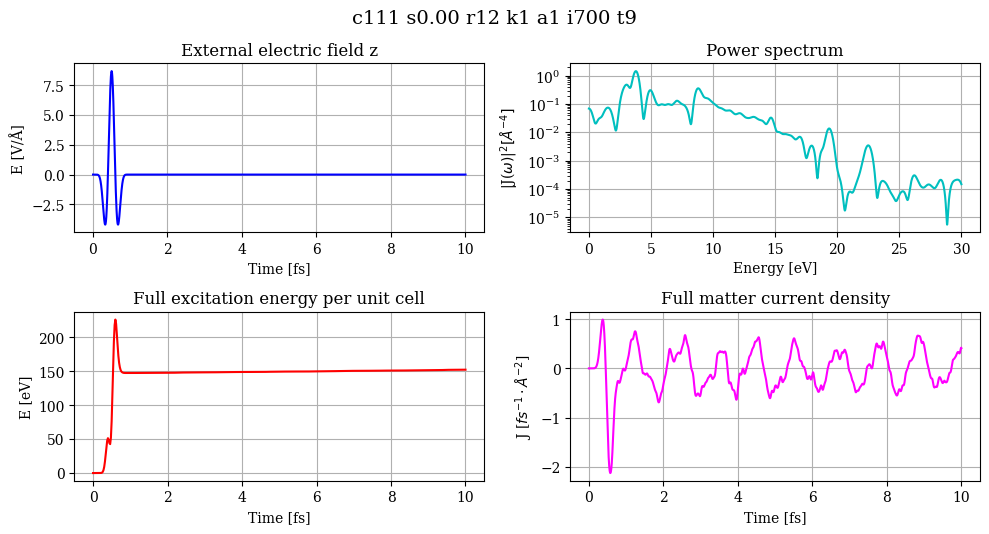

In [13]:
# In[48]:


# for folder in sorted_folders:
#     t, E, Jw2_am, El_f, J_nonl, J = plot_nonlinear_response_v1(folder, ax)

for folder in sorted_folders:
    plot_nonlinear_response_v2(folder, ax)